In [6]:
## 1. Import  Necessory Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
#setup visualization style
sns.set(style = "whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

In [8]:
#Load the Dataset
df = pd.read_csv("/content/Netflix Dataset.csv")

In [9]:
#Quick look at dataset
print("shape of Dataset:",df.shape)
print("\nColumn:",df.columns.tolist())
print("\nMissing Values:\n",df.isnull().sum())

shape of Dataset: (7789, 11)

Column: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


#Data Cleaning

In [10]:
# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'],errors = 'coerce')


In [11]:
# Handle missing values
df['year'] = df['Release_Date'].dt.year

In [12]:
## Handle missing values
df['Director'] = df['Director'].fillna("unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
df['Country' ]= df['Country'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Not Rated")

In [13]:
#Extract Main Genre (first genre listed in 'Type')
df['Main_Genre'] = df['Type'].apply(lambda x:x.split(",")[0].strip()if pd.notnull(x) else "Unknown")

#EDA

In [14]:
#Count of Movies vs TV shows
print("\nCategory Distribution:\n",df['Category'].value_counts())



Category Distribution:
 Category
Movie      5379
TV Show    2410
Name: count, dtype: int64


In [15]:
# Top Countries
print("\nTop 5 Countries:\n", df['Country'].value_counts().head(5))


Top 5 Countries:
 Country
United States     2556
India              923
Unknown            507
United Kingdom     397
Japan              226
Name: count, dtype: int64


In [18]:
# Dataset span (years)
print("\nDataset covers years from", df['year'].min(), "to", df['year'].max())


Dataset covers years from 2008.0 to 2021.0


#5. Analysis & Visualizations

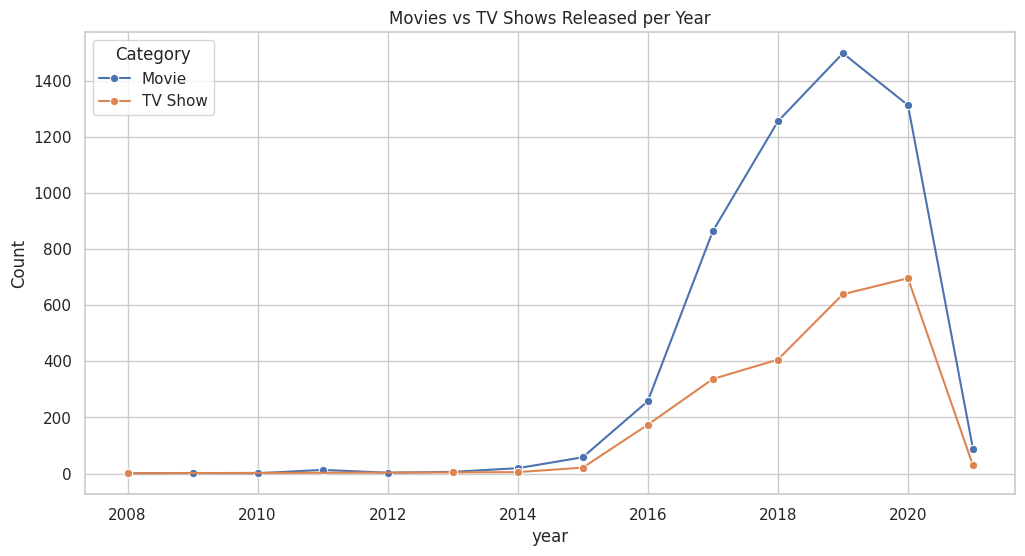

In [22]:

# 1. Line Chart – Movies vs. TV Shows released per year
content_trend = df.groupby(['year', 'Category']).size().reset_index(name='Count')
sns.lineplot(data=content_trend, x='year', y='Count', hue='Category', marker='o')
plt.title("Movies vs TV Shows Released per Year")
plt.xlabel("year")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-2941333989.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


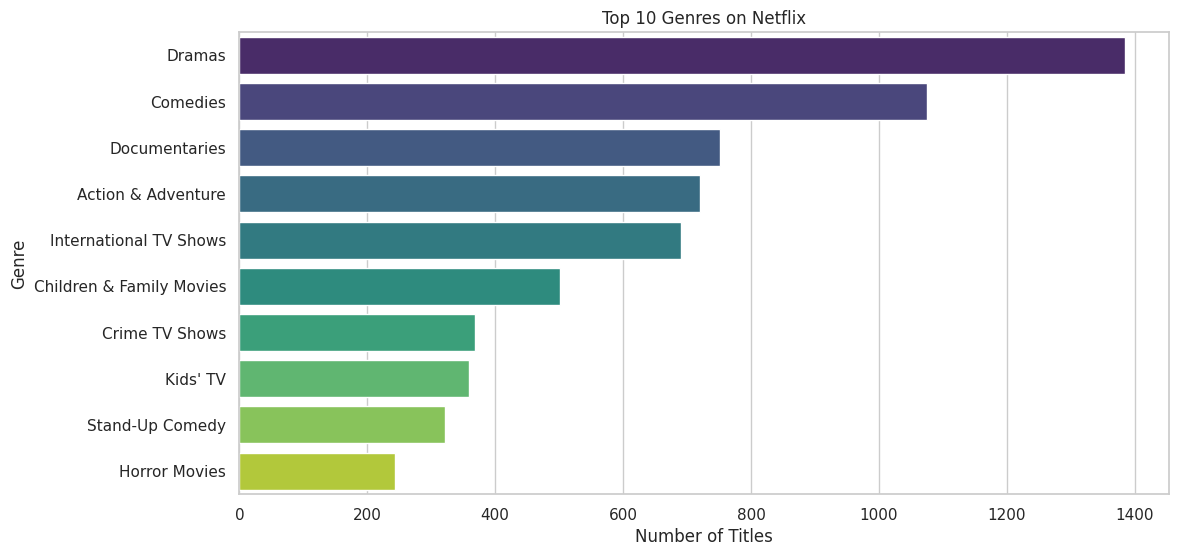

In [23]:
# 2. Bar Chart – Top 10 Genres
top_genres = df['Main_Genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

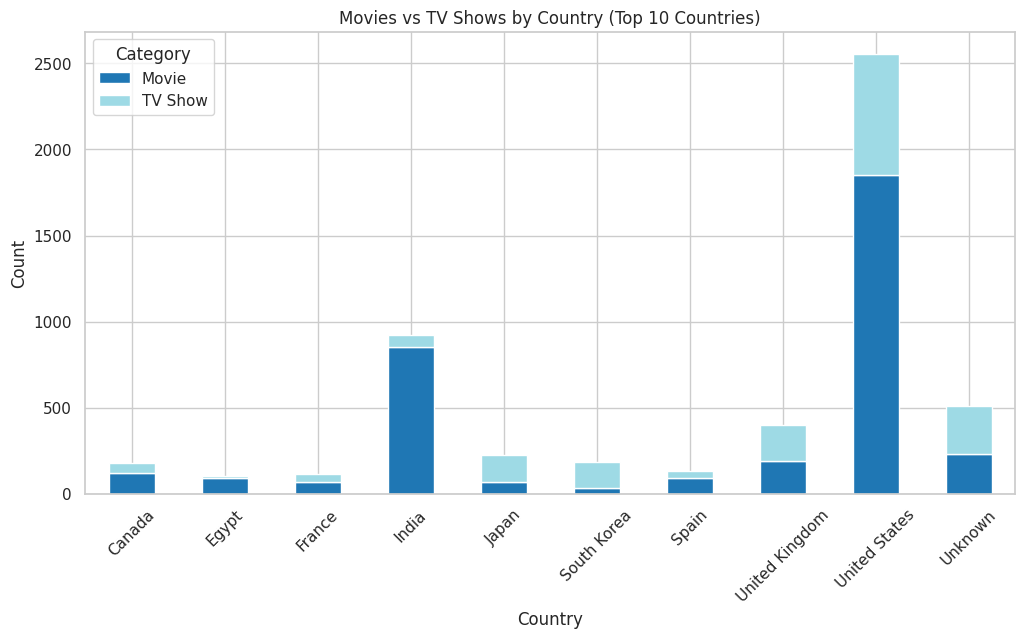

In [24]:

# 3. Stacked Bar Chart – Movies vs TV Shows per Country (Top 10 countries)
top_countries = df['Country'].value_counts().head(10).index
country_data = df[df['Country'].isin(top_countries)]
stacked = country_data.groupby(['Country', 'Category']).size().unstack(fill_value=0)
stacked.plot(kind='bar', stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Movies vs TV Shows by Country (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [25]:
# 4. Choropleth Map – Country-wise Content
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
fig = px.choropleth(country_counts, locations="Country", locationmode="country names",
                    color="Count", hover_name="Country",
                    color_continuous_scale="viridis", title="Netflix Content by Country")
fig.show()

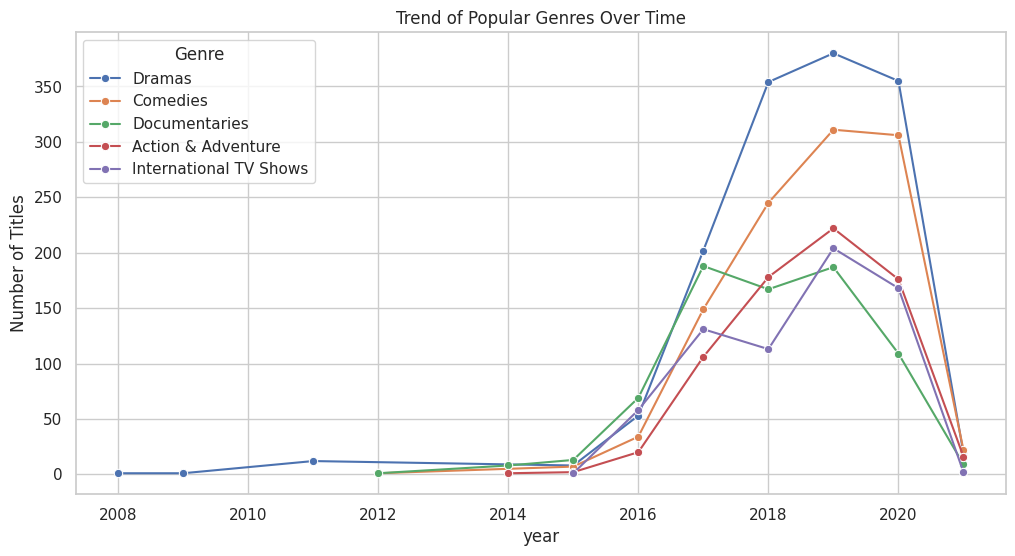

In [28]:
# 5. Trend Line – Growth of Popular Genres Over Time
popular_genres = df['Main_Genre'].value_counts().head(5).index
genre_trends = df[df['Main_Genre'].isin(popular_genres)].groupby(['year','Main_Genre']).size().reset_index(name='Count')

sns.lineplot(data=genre_trends, x='year', y='Count', hue='Main_Genre', marker="o")
plt.title("Trend of Popular Genres Over Time")
plt.xlabel("year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre")
plt.show()